# 针对腾讯开源词向量,使用t-sen做降维可视化
- 由于显示空间,和词库太大所以只是随机的抽取了部分词语做定性的分析
- 解决了在服务器环境下,没有root权限,matplotlib画图中文乱码的问题
- 最后可以很直观的看出,语义相近的词的确是有聚拢的趋势

In [1]:
%%time
import pandas as pd
import numpy as np
#直接使用KeyedVectors.load_word2vec_format 加载非常慢


def load_embedding(path, limit=None):
    embedding_index = {}
    f = open(path,encoding='utf8')
    for index,line in enumerate(f):
        if index == 0:
            continue
        if limit and index>limit:
            break
        
        values = line.split(' ')
        word = values[0]
        coefs = np.asarray(values[1:],dtype='float32')
        embedding_index[word] = coefs
    f.close()
    return embedding_index

embed = load_embedding('../Tencent_AILab_ChineseEmbedding.txt', 10000)
all_embs = np.stack(embed.values())
df = pd.DataFrame(all_embs, index=embed.keys())

df.shape

CPU times: user 3.06 s, sys: 4.89 s, total: 7.95 s
Wall time: 986 ms


In [2]:
%%time

df = df.sample(5000)

print(df.shape)

# Take the first 500 data points: it's hard to see 1500 points
X = df.values
y = df.index

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)



(5000, 200)
CPU times: user 1min 48s, sys: 23.9 s, total: 2min 12s
Wall time: 2min 13s


In [3]:
res = pd.DataFrame(X_2d, index=y)
res.shape

(5000, 2)

Load font from :../fonts/SimHei.ttf


/apps/dslab/anaconda/python3/lib/python3.6/site-packages/ipykernel/__main__.py:29: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
No handles with labels found to put in legend.


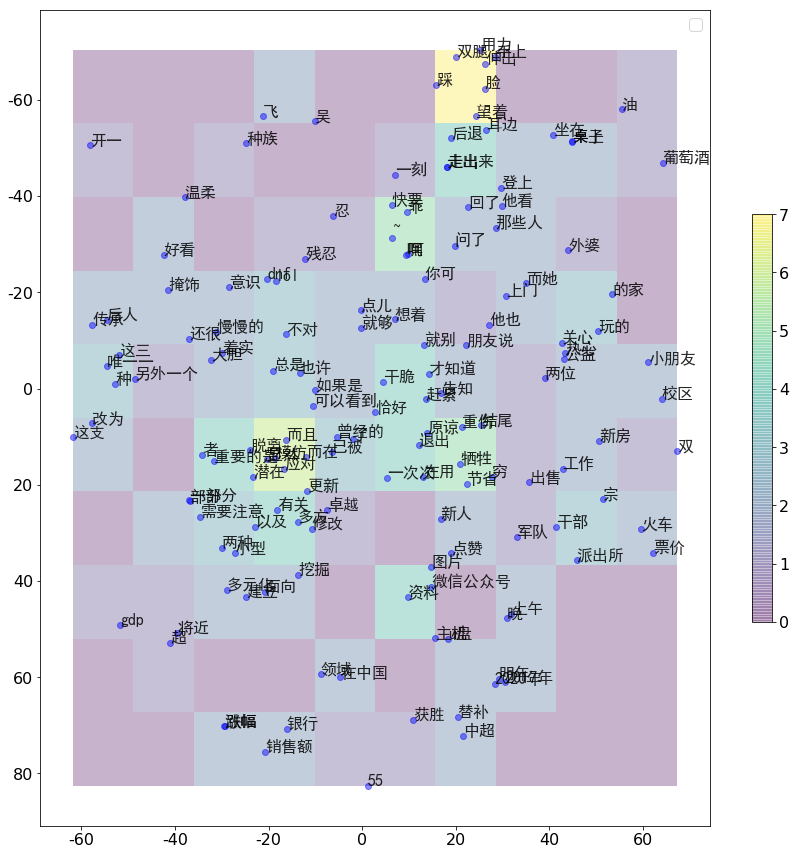

In [126]:
from matplotlib import pyplot as plt
import matplotlib
import os
%matplotlib inline
font_path = '../fonts/SimHei.ttf'
if os.path.exists(font_path):
    print(f'Load font from :{font_path}')
    font = matplotlib.font_manager.FontProperties(fname=font_path, size=16) 
else:
    font = matplotlib.font_manager.FontProperties(['SimHei'])  
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签

plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
SMALL_SIZE = 16
plt.rc('font', size=SMALL_SIZE)

tmp = res.sample(150,random_state=0)

from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))


#热力图Begin
bin_cnt = 10
hm = pd.DataFrame()
hm['x'] = pd.cut(tmp[0], bin_cnt) 
hm['x'] = pd.cut(tmp[0], bin_cnt)#.cat.codes
hm['y'] = pd.cut(tmp[1], bin_cnt)#.cat.codes
hm = hm.groupby(['x','y'])['x'].agg({'cnt':'count'}).reset_index()

hm = hm.pivot_table(columns=['x'], index=['y'], values=['cnt'])
hm = hm.fillna(0)
 
extend = [tmp[0].min(), tmp[0].max() ,  tmp[1].max() , tmp[1].min(),]
plt.imshow(hm, interpolation='nearest',aspect='auto', extent=extend, alpha=0.3)
plt.colorbar(shrink=0.5)
#热力图end

#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for label, row in tmp.iterrows():
    #print(row[0], row[1], label)
    plt.scatter(row[0], row[1],color='blue',alpha=0.45)
    plt.annotate(label, (row[0], row[1]), fontproperties=font,alpha=0.85)
    

plt.legend()
plt.show()

# 中文字体乱码

如果字体不存在,在没有root权限情况下需要手工安装字体

wget https://github.com/StellarCN/scp_zh/raw/master/fonts/SimHei.ttf